<a href="https://colab.research.google.com/github/AmirH-mirz/BankLoan_Classification/blob/main/CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile

In [3]:
with ZipFile('drive/MyDrive/Dataset/Rice_Dataset.zip', 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
from numpy import asarray
import numpy as np
import pandas as pd
import cv2
import glob
import os
import random
import subprocess
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.image import imread
import seaborn as sns

In [6]:
image_list_Arborio=[]
image_list_Basmati=[]
image_list_Ipsala=[]
image_list_Jasmine=[]
image_list_Karacadag=[]

for Arborio in os.listdir("/content/Rice_Dataset/Arborio"):
                          if Arborio.endswith(".png") or Arborio.endswith(".jpg"):
                              image_list_Arborio.append(os.path.join("/content/Rice_Dataset/Arborio"
                                                                     ,Arborio))
                              print(os.path.join("/content/Rice_Dataset/Arborio",Arborio))

for Basmati in os.listdir("/content/Rice_Dataset/Basmati"):
                          if Basmati.endswith(".png") or Basmati.endswith(".jpg"):
                              image_list_Basmati.append(os.path.join("/content/Rice_Dataset/Basmati"
                                                                     ,Basmati))
                              print(os.path.join("/content/Rice_Dataset/Basmati",Basmati))

for Ipsala in os.listdir("/content/Rice_Dataset/Ipsala"):
                          if Ipsala.endswith(".png") or Ipsala.endswith(".jpg"):
                              image_list_Ipsala.append(os.path.join("/content/Rice_Dataset/Ipsala"
                                                                     ,Ipsala))
                              print(os.path.join("/content/Rice_Dataset/Ipsala",Ipsala))

for Jasmine in os.listdir("/content/Rice_Dataset/Jasmine"):
                          if Jasmine.endswith(".png") or Jasmine.endswith(".jpg"):
                              image_list_Jasmine.append(os.path.join("/content/Rice_Dataset/Jasmine"
                                                                     ,Jasmine))
                              print(os.path.join("/content/Rice_Dataset/Jasmine",Jasmine))

for Karacadag in os.listdir("/content/Rice_Dataset/Karacadag"):
                          if Karacadag.endswith(".png") or Karacadag.endswith(".jpg"):
                              image_list_Karacadag.append(os.path.join("/content/Rice_Dataset/Karacadag"
                                                                     ,Karacadag))
                              print(os.path.join("/content/Rice_Dataset/Karacadag",Karacadag))

Streaming output truncated to the last 5000 lines.
/content/Rice_Dataset/Karacadag/Karacadag (4455).jpg
/content/Rice_Dataset/Karacadag/Karacadag (14933).jpg
/content/Rice_Dataset/Karacadag/Karacadag (7879).jpg
/content/Rice_Dataset/Karacadag/Karacadag (14288).jpg
/content/Rice_Dataset/Karacadag/Karacadag (6236).jpg
/content/Rice_Dataset/Karacadag/Karacadag (13470).jpg
/content/Rice_Dataset/Karacadag/Karacadag (6225).jpg
/content/Rice_Dataset/Karacadag/Karacadag (1022).jpg
/content/Rice_Dataset/Karacadag/Karacadag (14497).jpg
/content/Rice_Dataset/Karacadag/Karacadag (1257).jpg
/content/Rice_Dataset/Karacadag/Karacadag (12814).jpg
/content/Rice_Dataset/Karacadag/Karacadag (5601).jpg
/content/Rice_Dataset/Karacadag/Karacadag (1625).jpg
/content/Rice_Dataset/Karacadag/Karacadag (14050).jpg
/content/Rice_Dataset/Karacadag/Karacadag (14745).jpg
/content/Rice_Dataset/Karacadag/Karacadag (7419).jpg
/content/Rice_Dataset/Karacadag/Karacadag (482).jpg
/content/Rice_Dataset/Karacadag/Karacadag 

In [7]:
import matplotlib.image as mpimg

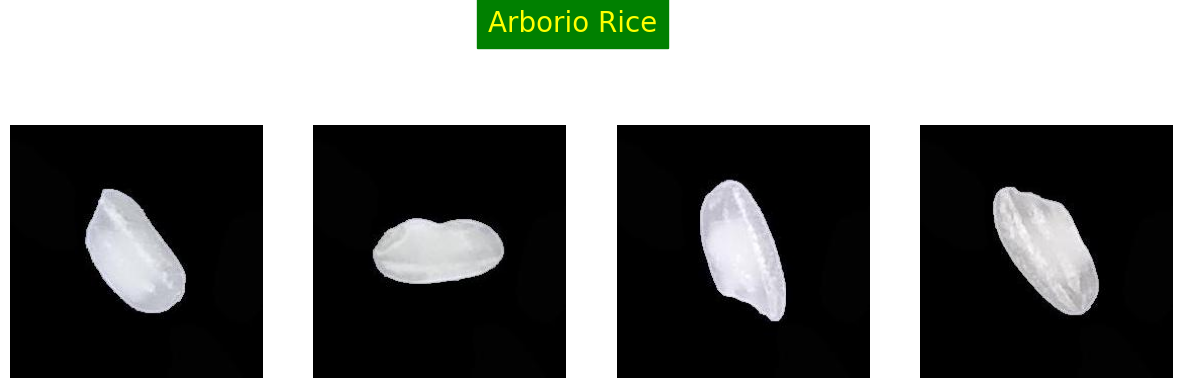

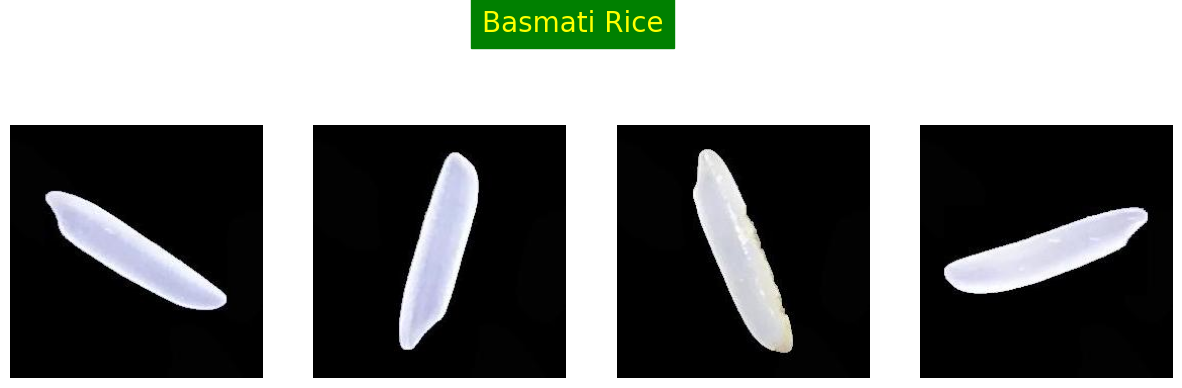

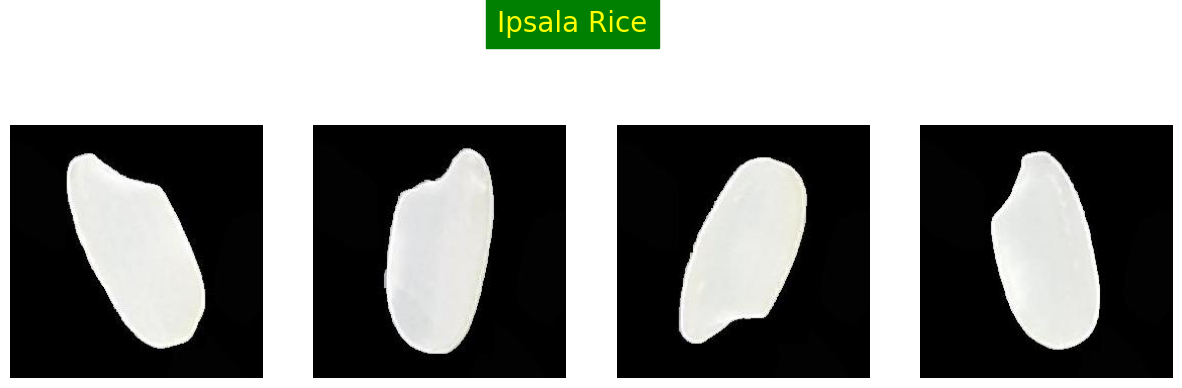

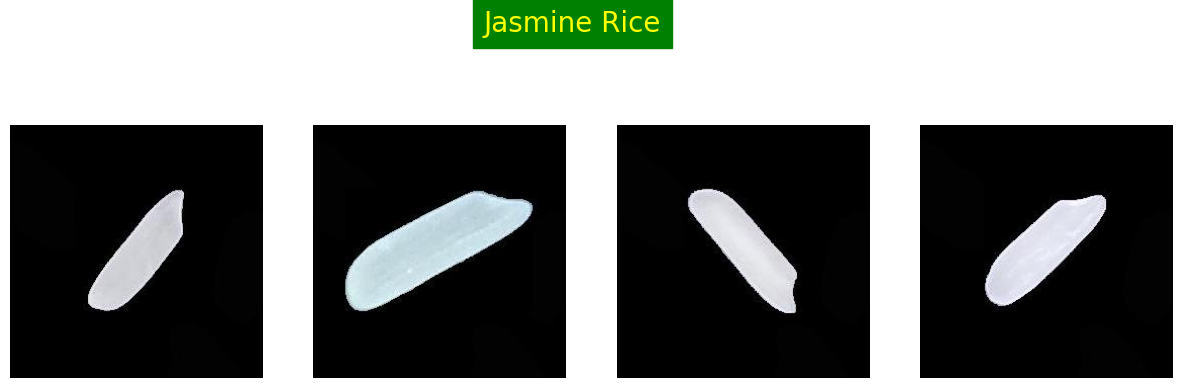

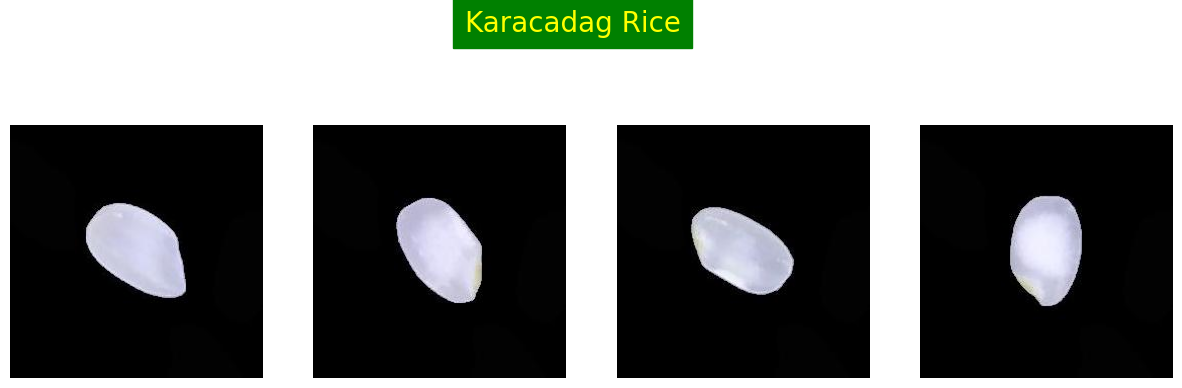

In [8]:
# import matplotlib.pyplot as plt

def plot_images(image_list, title):
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle(title,backgroundcolor="green",color="yellow",fontsize=20)

    for i in range(4):
        img_path = image_list[i]
        img = mpimg.imread(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')


# Plot images from each list
plot_images(image_list_Arborio[:4], 'Arborio Rice')
plot_images(image_list_Basmati[:4], 'Basmati Rice')
plot_images(image_list_Ipsala[:4], 'Ipsala Rice')
plot_images(image_list_Jasmine[:4], 'Jasmine Rice')
plot_images(image_list_Karacadag[:4], 'Karacadag Rice')

plt.show()

In [9]:
print("Class Arborio:",len(image_list_Arborio))
print("Class Basmati:",len(image_list_Basmati))
print("Class Ipsala:",len(image_list_Ipsala))
print("Class Jasmine:",len(image_list_Jasmine))
print("Class Karacadag:",len(image_list_Karacadag))

Class Arborio: 15000
Class Basmati: 15000
Class Ipsala: 15000
Class Jasmine: 15000
Class Karacadag: 15000


In [10]:
print(.75*len(image_list_Arborio), .2*len(image_list_Arborio), .05*len(image_list_Arborio))
print(.75*len(image_list_Basmati), .2*len(image_list_Basmati), .05*len(image_list_Basmati))
print(.75*len(image_list_Ipsala), .2*len(image_list_Ipsala), .05*len(image_list_Ipsala))
print(.75*len(image_list_Jasmine), .2*len(image_list_Jasmine), .05*len(image_list_Jasmine))
print(.75*len(image_list_Karacadag), .2*len(image_list_Karacadag), .05*len(image_list_Karacadag))

11250.0 3000.0 750.0
11250.0 3000.0 750.0
11250.0 3000.0 750.0
11250.0 3000.0 750.0
11250.0 3000.0 750.0


In [11]:
print("{:<10} {:<10} {:<10} {:<10}".format("Class", "Train", "Test", "Valid"))

train_Arborio = image_list_Arborio[:11250]
test_Arborio = image_list_Arborio[11250:14250]
valid_Arborio = image_list_Arborio[14250:]
print("{:<10} {:<10} {:<10} {:<10}".format("Arborio",len(train_Arborio), len(test_Arborio), len(valid_Arborio)))

train_Basmati = image_list_Basmati[:11250]
test_Basmati = image_list_Basmati[11250:14250]
valid_Basmati = image_list_Basmati[14250:]
print("{:<10} {:<10} {:<10} {:<10}".format("Basmati",len(train_Basmati), len(test_Basmati), len(valid_Basmati)))

train_Ipsala = image_list_Ipsala[:11250]
test_Ipsala = image_list_Ipsala[11250:14250]
valid_Ipsala = image_list_Ipsala[14250:]
print("{:<10} {:<10} {:<10} {:<10}".format("Ipsala",len(train_Ipsala), len(test_Ipsala), len(valid_Ipsala)))

train_Jasmine = image_list_Jasmine[:11250]
test_Jasmine = image_list_Jasmine[11250:14250]
valid_Jasmine = image_list_Jasmine[14250:]
print("{:<10} {:<10} {:<10} {:<10}".format("Jasmine",len(train_Jasmine), len(test_Jasmine), len(valid_Jasmine)))

train_Karacadag = image_list_Karacadag[:11250]
test_Karacadag = image_list_Karacadag[11250:14250]
valid_Karacadag = image_list_Karacadag[14250:]
print("{:<10} {:<10} {:<10} {:<10}".format("Karacadag",len(train_Karacadag), len(test_Karacadag), len(valid_Karacadag)))

Class      Train      Test       Valid     
Arborio    11250      3000       750       
Basmati    11250      3000       750       
Ipsala     11250      3000       750       
Jasmine    11250      3000       750       
Karacadag  11250      3000       750       


In [12]:
train_Arborio_df = pd.DataFrame({'image':train_Arborio, 'label':'Arborio'})
train_Basmati_df = pd.DataFrame({'image':train_Basmati, 'label':'Basmati'})
train_Ipsala_df = pd.DataFrame({'image':train_Ipsala, 'label':'Ipsala'})
train_Jasmine_df = pd.DataFrame({'image':train_Jasmine, 'label':'Jasmine'})
train_Karacadag_df = pd.DataFrame({'image':train_Karacadag, 'label':'Karacadag'})

In [13]:
test_Arborio_df = pd.DataFrame({'image':test_Arborio, 'label':'Arborio'})
test_Basmati_df = pd.DataFrame({'image':test_Basmati, 'label':'Basmati'})
test_Ipsala_df = pd.DataFrame({'image':test_Ipsala, 'label':'Ipsala'})
test_Jasmine_df = pd.DataFrame({'image':test_Jasmine, 'label':'Jasmine'})
test_Karacadag_df = pd.DataFrame({'image':test_Karacadag, 'label':'Karacadag'})

In [14]:
valid_Arborio_df = pd.DataFrame({'image':valid_Arborio, 'label':'Arborio'})
valid_Basmati_df = pd.DataFrame({'image':valid_Basmati, 'label':'Basmati'})
valid_Ipsala_df = pd.DataFrame({'image':valid_Ipsala, 'label':'Ipsala'})
valid_Jasmine_df = pd.DataFrame({'image':valid_Jasmine, 'label':'Jasmine'})
valid_Karacadag_df = pd.DataFrame({'image':valid_Karacadag, 'label':'Karacadag'})

In [15]:
train_df = pd.concat([train_Arborio_df,train_Basmati_df,train_Ipsala_df,train_Jasmine_df,
                      train_Karacadag_df])
test_df = pd.concat([test_Arborio_df,test_Basmati_df,test_Ipsala_df,test_Jasmine_df,
                     test_Karacadag_df])
val_df = pd.concat([valid_Arborio_df,valid_Basmati_df,valid_Ipsala_df,valid_Jasmine_df,
                    valid_Karacadag_df])

In [16]:
train_df

,image,label
0,/content/Rice_Dataset/Arborio/Arborio (5624).jpg,Arborio
1,/content/Rice_Dataset/Arborio/Arborio (12864).jpg,Arborio
2,/content/Rice_Dataset/Arborio/Arborio (5535).jpg,Arborio
3,/content/Rice_Dataset/Arborio/Arborio (1950).jpg,Arborio
4,/content/Rice_Dataset/Arborio/Arborio (9888).jpg,Arborio
...,...,...
11245,/content/Rice_Dataset/Karacadag/Karacadag (291...,Karacadag
11246,/content/Rice_Dataset/Karacadag/Karacadag (708...,Karacadag
11247,/content/Rice_Dataset/Karacadag/Karacadag (111...,Karacadag
11248,/content/Rice_Dataset/Karacadag/Karacadag (887...,Karacadag


In [17]:
print("Rows in train_df:",len(train_df))
print("Rows in test_df:",len(test_df))
print("Rows in vaid_df:",len(val_df))

Rows in train_df: 56250
Rows in test_df: 15000
Rows in vaid_df: 3750


In [18]:
from PIL import Image

In [19]:
random_img = random.choice(train_Arborio)

In [20]:
image = cv2.imread(random_img)
height,width = image.shape[:2]
print("Width:",width)
print("Height:",height)

Width: 250
Height: 250


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
trainGenerator = ImageDataGenerator(rescale=1./255)
testGenerator = ImageDataGenerator(rescale=1./255)
valGenerator = ImageDataGenerator(rescale=1./255)

In [23]:
# resize the images from the directories to prevent ResourceExhaustedError
IMAGE_SIZE = (150, 150)

In [24]:
Train = trainGenerator.flow_from_dataframe(
    dataframe = train_df,
    class_mode = "categorical",
    x_col = "image",
    y_col = "label",
    batch_size = 32,
    seed = 42,
    shuffle = True,
    rotation_range=20,  # Randomly rotate images within this range
    width_shift_range=0.2,  # Randomly shift image horizontally
    height_shift_range=0.2,  # Randomly shift image vertically
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Randomly zoom in/out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # Fill missing pixels after transformations
    target_size=IMAGE_SIZE)
Test = testGenerator.flow_from_dataframe(
    dataframe = test_df,
    class_mode = "categorical",
    x_col = "image",
    y_col = "label",
    batch_size = 32,
    seed = 42,
    shuffle = False,
    target_size=IMAGE_SIZE)
Validation = valGenerator.flow_from_dataframe(
    dataframe = val_df,
    class_mode = "categorical",
    x_col = "image",
    y_col = "label",
    batch_size = 32,
    seed = 42,
    shuffle = False,
    target_size=IMAGE_SIZE)

Found 56250 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
Found 3750 validated image filenames belonging to 5 classes.


In [25]:
# check shape of train, validation, test
for image_batch, labels_batch in Train:
    print(f"Train Shape: {image_batch.shape} (Bathes = {len(Train)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Validation:
    print(f"Validation Shape: {image_batch.shape} (Bathes = {len(Validation)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Test:
    print(f"Test Shape: {image_batch.shape} (Bathes = {len(Test)})")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train Shape: (32, 150, 150, 3) (Bathes = 1758)
Train label: (32, 5)

Validation Shape: (32, 150, 150, 3) (Bathes = 118)
Validation label: (32, 5)

Test Shape: (32, 150, 150, 3) (Bathes = 469)
Test label: (32, 5)



## Model CNN_1

In [ ]:
CNN1 = tf.keras.Sequential(

    [
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]),
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512,activation='relu'),
        tf.keras.layers.Dense(units=5,activation='sigmoid')
    ]

)
CNN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               89719296  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 89722757 (342.27 MB)
Trainable params: 89722757 (342.27 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [26]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

In [ ]:
CNN1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
# Define the EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Stop training if no improvement for 8 consecutive epochs
    restore_best_weights=True  # Restore best weights based on validation loss
)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    min_lr=1e-6)

In [ ]:
CNN_model = CNN1.fit(
    x=Train,
    validation_data=Validation,
    epochs=10 ,
    callbacks=[early_stopping, lr_scheduler])


Epoch 1/10
1758/1758 [==============================] - 85s 46ms/step - loss: 0.0388 - accuracy: 0.9729 - val_loss: 0.0211 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 2/10
1758/1758 [==============================] - 80s 46ms/step - loss: 0.0148 - accuracy: 0.9883 - val_loss: 0.0140 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 3/10
1758/1758 [==============================] - 84s 48ms/step - loss: 0.0100 - accuracy: 0.9915 - val_loss: 0.0234 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 4/10
1758/1758 [==============================] - 80s 45ms/step - loss: 0.0072 - accuracy: 0.9940 - val_loss: 0.0123 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 5/10
1758/1758 [==============================] - 80s 46ms/step - loss: 0.0089 - accuracy: 0.9922 - val_loss: 0.0164 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 6/10
1758/1758 [==============================] - 85s 49ms/step - loss: 0.0025 - accuracy: 0.9981 - val_loss: 0.0174 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 7/10
1757/1758 [========================

In [ ]:
# Extract learning rates and corresponding losses from the history
train_accuracy = CNN_model.history['accuracy']
train_losses = CNN_model.history['loss']
val_accuracy = CNN_model.history['val_accuracy']
val_losses = CNN_model.history['val_loss']

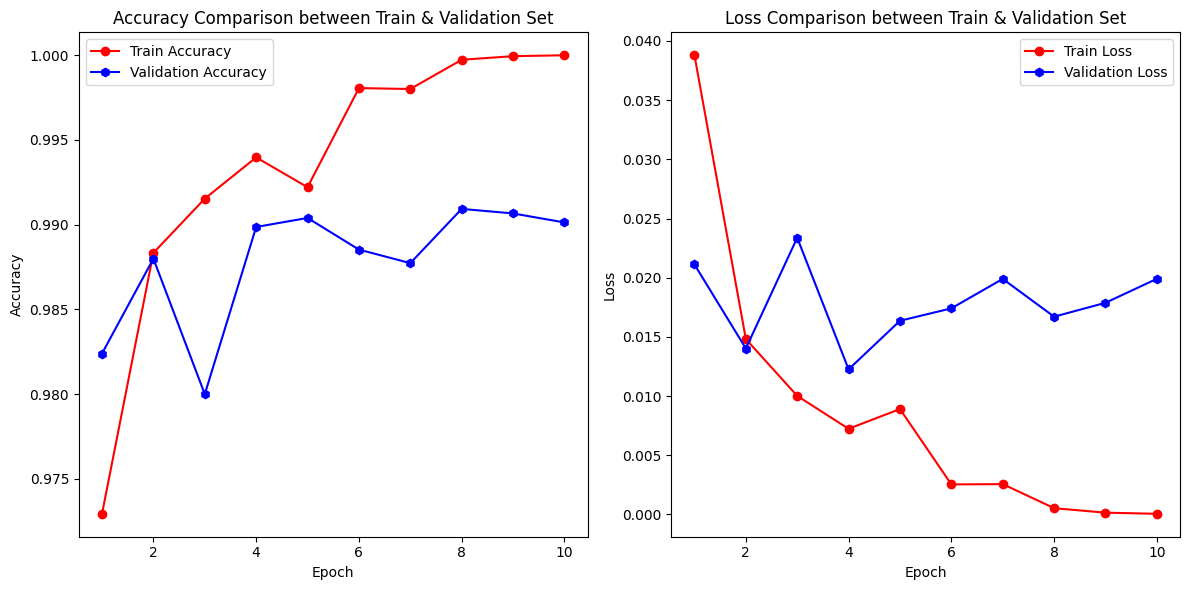

In [ ]:
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'r', marker='o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', marker='h', label='Validation Accuracy')
plt.title('Accuracy Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'r', marker='o', label='Train Loss')
plt.plot(epochs, val_losses, 'b', marker='h', label='Validation Loss')
plt.title('Loss Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Model CNN_2**

In [ ]:
CNN2 = tf.keras.Sequential(

    [
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]),
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5,activation='sigmoid')
    ]

)
CNN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               89719296  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                      

In [ ]:
CNN2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
CNN_model = CNN2.fit(
    x=Train,
    validation_data=Validation,
    epochs=10 ,
    callbacks=[early_stopping])


Epoch 1/10
1758/1758 [==============================] - 81s 45ms/step - loss: 0.0508 - accuracy: 0.9650 - val_loss: 0.0155 - val_accuracy: 0.9869
Epoch 2/10
1758/1758 [==============================] - 73s 42ms/step - loss: 0.0173 - accuracy: 0.9867 - val_loss: 0.0149 - val_accuracy: 0.9859
Epoch 3/10
1758/1758 [==============================] - 77s 44ms/step - loss: 0.0136 - accuracy: 0.9894 - val_loss: 0.0094 - val_accuracy: 0.9912
Epoch 4/10
1758/1758 [==============================] - 72s 41ms/step - loss: 0.0097 - accuracy: 0.9925 - val_loss: 0.0113 - val_accuracy: 0.9923
Epoch 5/10
1758/1758 [==============================] - 74s 42ms/step - loss: 0.0093 - accuracy: 0.9931 - val_loss: 0.0143 - val_accuracy: 0.9875
Epoch 6/10
1758/1758 [==============================] - 74s 42ms/step - loss: 0.0252 - accuracy: 0.9792 - val_loss: 0.0250 - val_accuracy: 0.9800
Epoch 7/10
1758/1758 [==============================] - 78s 44ms/step - loss: 0.0090 - accuracy: 0.9924 - val_loss: 0.0173 -

In [ ]:
train_accuracy = CNN_model.history['accuracy']
train_losses = CNN_model.history['loss']
val_accuracy = CNN_model.history['val_accuracy']
val_losses = CNN_model.history['val_loss']

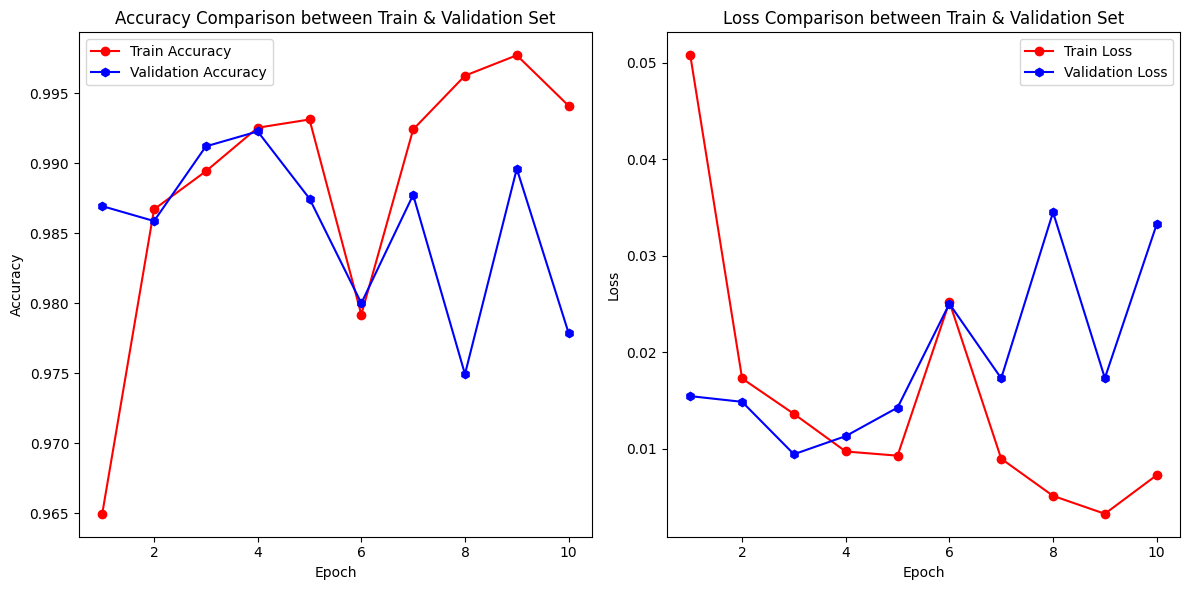

In [ ]:
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'r', marker='o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', marker='h', label='Validation Accuracy')
plt.title('Accuracy Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'r', marker='o', label='Train Loss')
plt.plot(epochs, val_losses, 'b', marker='h', label='Validation Loss')
plt.title('Loss Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Model_3**


In [27]:
from tensorflow.keras import regularizers

In [ ]:
CNN3 = tf.keras.Sequential(

    [
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               kernel_regularizer=regularizers.l2(0.01), input_shape=[150, 150, 3]),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
    ]

)
CNN3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               89719296  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                        

In [ ]:
CNN3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
CNN_model = CNN3.fit(
    x=Train,
    validation_data=Validation,
    epochs=10 ,
    callbacks=[early_stopping])


Epoch 1/10
1758/1758 [==============================] - 83s 47ms/step - loss: 0.4989 - accuracy: 0.7791 - val_loss: 0.2370 - val_accuracy: 0.9419
Epoch 2/10
1758/1758 [==============================] - 81s 46ms/step - loss: 0.2781 - accuracy: 0.8222 - val_loss: 0.2190 - val_accuracy: 0.9315
Epoch 3/10
1758/1758 [==============================] - 81s 46ms/step - loss: 0.2639 - accuracy: 0.8196 - val_loss: 0.2016 - val_accuracy: 0.9331
Epoch 4/10
1758/1758 [==============================] - 81s 46ms/step - loss: 0.2626 - accuracy: 0.8243 - val_loss: 0.2008 - val_accuracy: 0.9400
Epoch 5/10
1758/1758 [==============================] - 80s 46ms/step - loss: 0.2573 - accuracy: 0.8202 - val_loss: 0.2148 - val_accuracy: 0.9336
Epoch 6/10
1758/1758 [==============================] - 83s 47ms/step - loss: 0.2551 - accuracy: 0.8185 - val_loss: 0.1878 - val_accuracy: 0.9312
Epoch 7/10
1758/1758 [==============================] - 79s 45ms/step - loss: 0.2551 - accuracy: 0.8140 - val_loss: 0.1869 -

In [ ]:
train_accuracy = CNN_model.history['accuracy']
train_losses = CNN_model.history['loss']
val_accuracy = CNN_model.history['val_accuracy']
val_losses = CNN_model.history['val_loss']

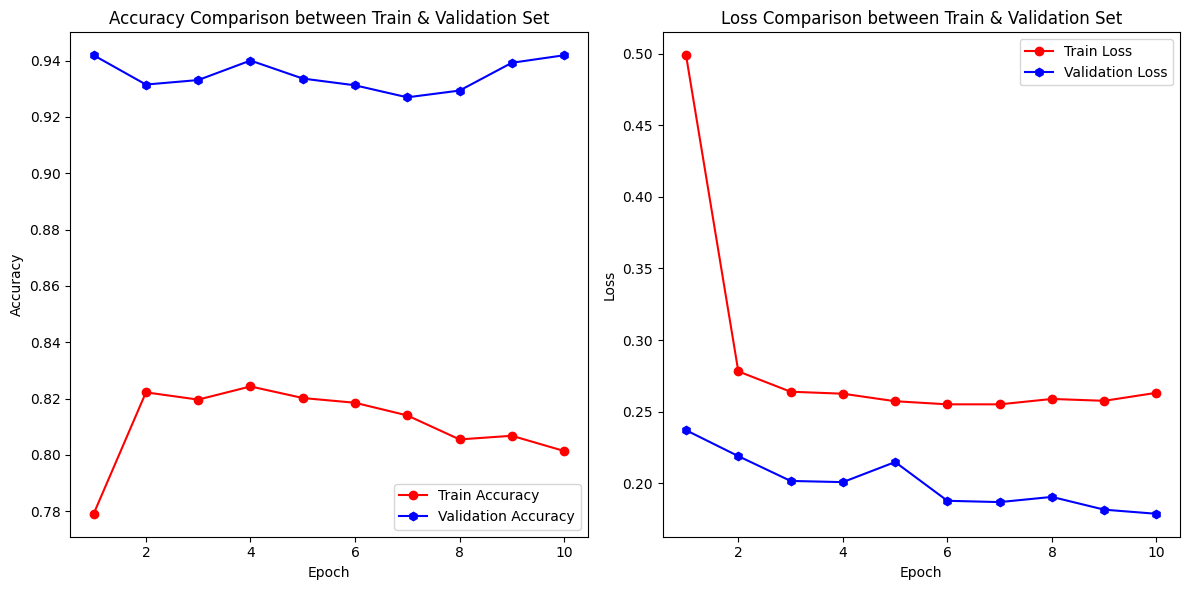

In [ ]:
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'r', marker='o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', marker='h', label='Validation Accuracy')
plt.title('Accuracy Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'r', marker='o', label='Train Loss')
plt.plot(epochs, val_losses, 'b', marker='h', label='Validation Loss')
plt.title('Loss Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Model_4**

In [ ]:
CNN4 = tf.keras.Sequential(

    [
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               kernel_regularizer=regularizers.l2(0.001), input_shape=[150, 150, 3]),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))
    ]

)
CNN4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               89719296  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                      

In [ ]:
CNN4.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
CNN_model = CNN4.fit(
    x=Train,
    validation_data=Validation,
    epochs=10 ,
    callbacks=[early_stopping, lr_scheduler])


Epoch 1/10
1758/1758 [==============================] - 91s 49ms/step - loss: 0.2240 - accuracy: 0.9037 - val_loss: 0.1278 - val_accuracy: 0.9539 - lr: 0.0010
Epoch 2/10
1758/1758 [==============================] - 82s 46ms/step - loss: 0.1649 - accuracy: 0.9054 - val_loss: 0.1146 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 3/10
1758/1758 [==============================] - 84s 48ms/step - loss: 0.1554 - accuracy: 0.9060 - val_loss: 0.1038 - val_accuracy: 0.9477 - lr: 0.0010
Epoch 4/10
1758/1758 [==============================] - 83s 47ms/step - loss: 0.1522 - accuracy: 0.9019 - val_loss: 0.1114 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 5/10
1758/1758 [==============================] - 83s 47ms/step - loss: 0.1520 - accuracy: 0.8995 - val_loss: 0.0969 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 6/10
1758/1758 [==============================] - 85s 48ms/step - loss: 0.1493 - accuracy: 0.9001 - val_loss: 0.1142 - val_accuracy: 0.9469 - lr: 0.0010
Epoch 7/10
1758/1758 [========================

In [ ]:
train_accuracy = CNN_model.history['accuracy']
train_losses = CNN_model.history['loss']
val_accuracy = CNN_model.history['val_accuracy']
val_losses = CNN_model.history['val_loss']

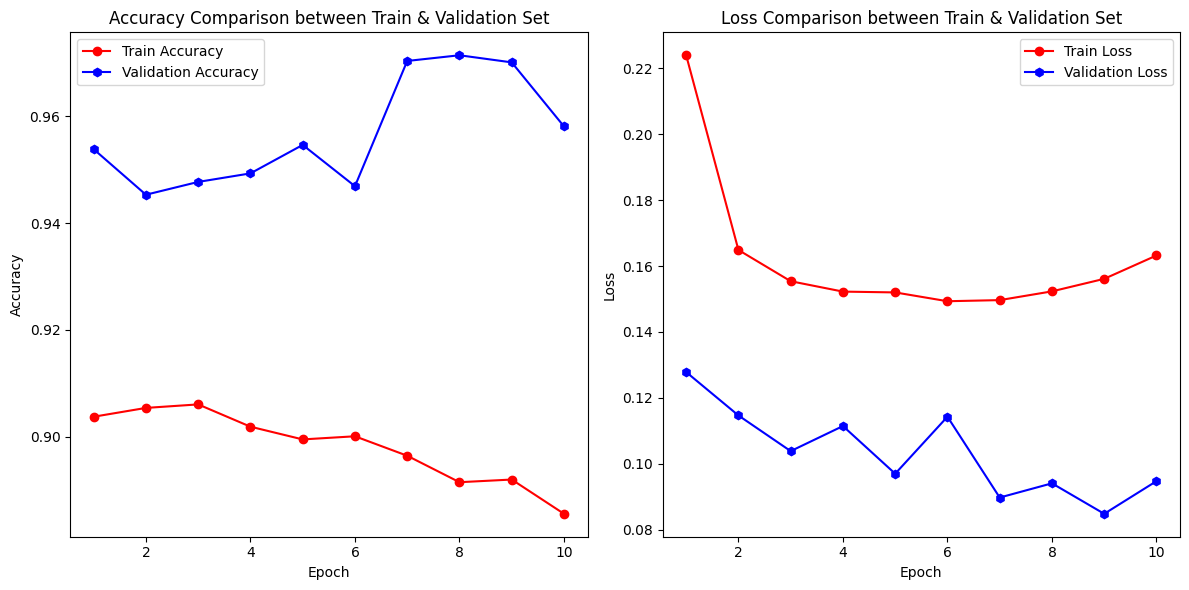

In [ ]:
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'r', marker='o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', marker='h', label='Validation Accuracy')
plt.title('Accuracy Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'r', marker='o', label='Train Loss')
plt.plot(epochs, val_losses, 'b', marker='h', label='Validation Loss')
plt.title('Loss Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Model_5**

In [28]:
CNN5 = tf.keras.Sequential(

    [
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               kernel_regularizer=regularizers.l2(0.001), input_shape=[150, 150, 3]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5, activation='softmax')
    ]

)
CNN5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               89719296  
                                                                 
 dropout (Dropout)           (None, 512)               0

In [29]:
CNN5.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
CNN_model = CNN5.fit(
    x=Train,
    validation_data=Validation,
    epochs=10 ,
    callbacks=[early_stopping, lr_scheduler])


Epoch 1/10
1758/1758 [==============================] - 98s 55ms/step - loss: 0.3009 - accuracy: 0.9721 - val_loss: 0.3856 - val_accuracy: 0.9517 - lr: 0.0010
Epoch 2/10
1758/1758 [==============================] - 88s 50ms/step - loss: 0.2821 - accuracy: 0.9737 - val_loss: 0.2288 - val_accuracy: 0.9861 - lr: 0.0010
Epoch 3/10
1758/1758 [==============================] - 87s 49ms/step - loss: 0.3009 - accuracy: 0.9727 - val_loss: 0.2374 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 4/10
1758/1758 [==============================] - 87s 49ms/step - loss: 0.2627 - accuracy: 0.9748 - val_loss: 0.2324 - val_accuracy: 0.9853 - lr: 0.0010
Epoch 5/10
1757/1758 [============================>.] - ETA: 0s - loss: 0.2858 - accuracy: 0.9719
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1758/1758 [==============================] - 87s 49ms/step - loss: 0.2859 - accuracy: 0.9719 - val_loss: 0.5641 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 6/10
1758/1758 [===================

In [34]:
train_accuracy = CNN_model.history['accuracy']
train_losses = CNN_model.history['loss']
val_accuracy = CNN_model.history['val_accuracy']
val_losses = CNN_model.history['val_loss']

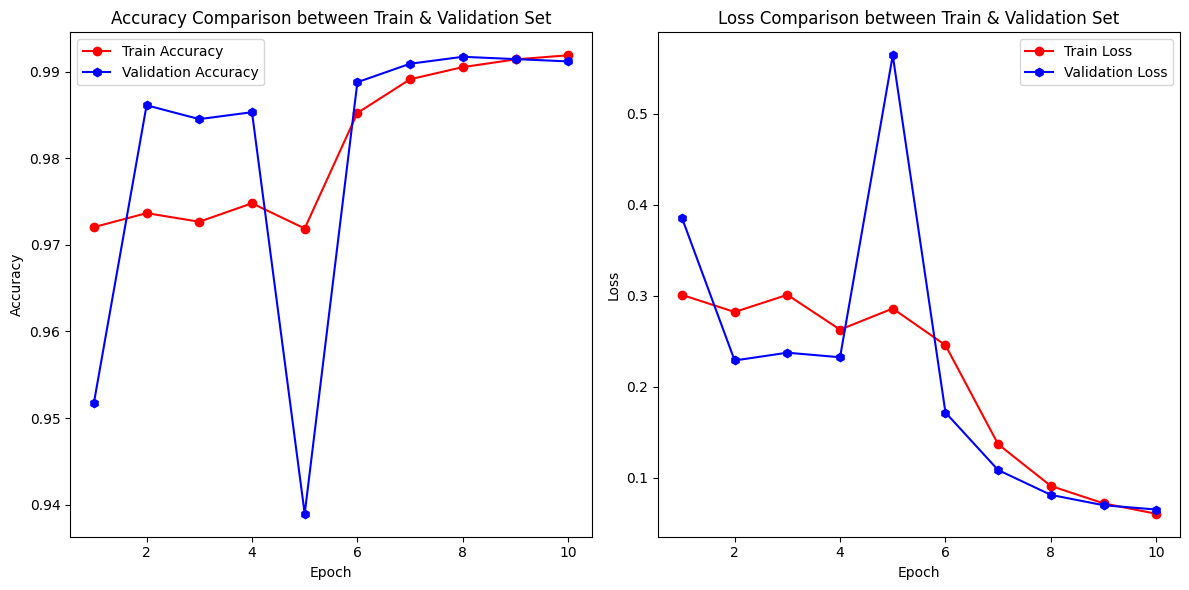

In [35]:
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'r', marker='o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', marker='h', label='Validation Accuracy')
plt.title('Accuracy Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'r', marker='o', label='Train Loss')
plt.plot(epochs, val_losses, 'b', marker='h', label='Validation Loss')
plt.title('Loss Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN5.evaluate(Test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

469/469 [==============================] - 15s 33ms/step - loss: 0.0611 - accuracy: 0.9913
Test Loss: 0.061083149164915085
Test Accuracy: 0.9913333058357239


In [42]:
predictions = CNN5.predict(Test)
y_pred = np.argmax(predictions,axis=1)
y_test =Test.classes
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Assuming you have labels mapping, you can get class names
class_names = list(Test.class_indices.keys())

# Print some predictions and true labels for verification
# Create a DataFrame to store predictions and true labels
df = pd.DataFrame({'Predicted': [class_names[pred] for pred in y_pred],
                   'True': [class_names[true] for true in y_test]})

df


469/469 [==============================] - 16s 33ms/step


,Predicted,True
0,Arborio,Arborio
1,Arborio,Arborio
2,Arborio,Arborio
3,Arborio,Arborio
4,Arborio,Arborio
...,...,...
14995,Karacadag,Karacadag
14996,Karacadag,Karacadag
14997,Karacadag,Karacadag
14998,Karacadag,Karacadag


In [39]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.99      0.99      0.99      3000
           2       1.00      1.00      1.00      3000
           3       0.99      0.99      0.99      3000
           4       0.99      0.99      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



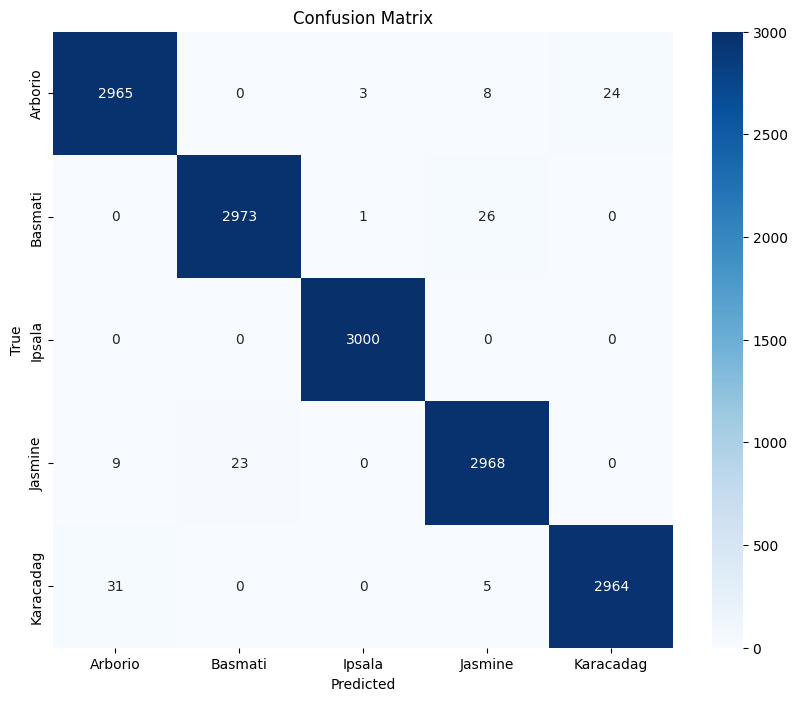

In [41]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Model_6**

In [58]:
CNN6 = tf.keras.Sequential(

    [
        tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu',
                               kernel_regularizer=regularizers.l2(0.001), input_shape=[150, 150, 3]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.Dense(units=120, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.7),
        tf.keras.layers.Dense(units=5, activation='softmax',kernel_regularizer=regularizers.l2(0.001))
    ]


)
CNN6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_9 (Bat  (None, 148, 148, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_10 (Ba  (None, 72, 72, 32)        128       
 tchNormalization)                                               
                                                      

In [59]:
CNN6.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
CNN_model = CNN6.fit(
    x=Train,
    validation_data=Validation,
    epochs=10 ,
    callbacks=[early_stopping])


Epoch 1/10
1758/1758 [==============================] - 69s 39ms/step - loss: 1.1947 - accuracy: 0.8260 - val_loss: 0.5214 - val_accuracy: 0.9861
Epoch 2/10
1758/1758 [==============================] - 65s 37ms/step - loss: 0.4971 - accuracy: 0.9535 - val_loss: 0.3052 - val_accuracy: 0.9931
Epoch 3/10
1758/1758 [==============================] - 64s 37ms/step - loss: 0.3002 - accuracy: 0.9777 - val_loss: 0.2159 - val_accuracy: 0.9923
Epoch 4/10
1423/1758 [=======================>......] - ETA: 12s - loss: 0.2192 - accuracy: 0.9849

In [55]:
train_accuracy = CNN_model.history['accuracy']
train_losses = CNN_model.history['loss']
val_accuracy = CNN_model.history['val_accuracy']
val_losses = CNN_model.history['val_loss']

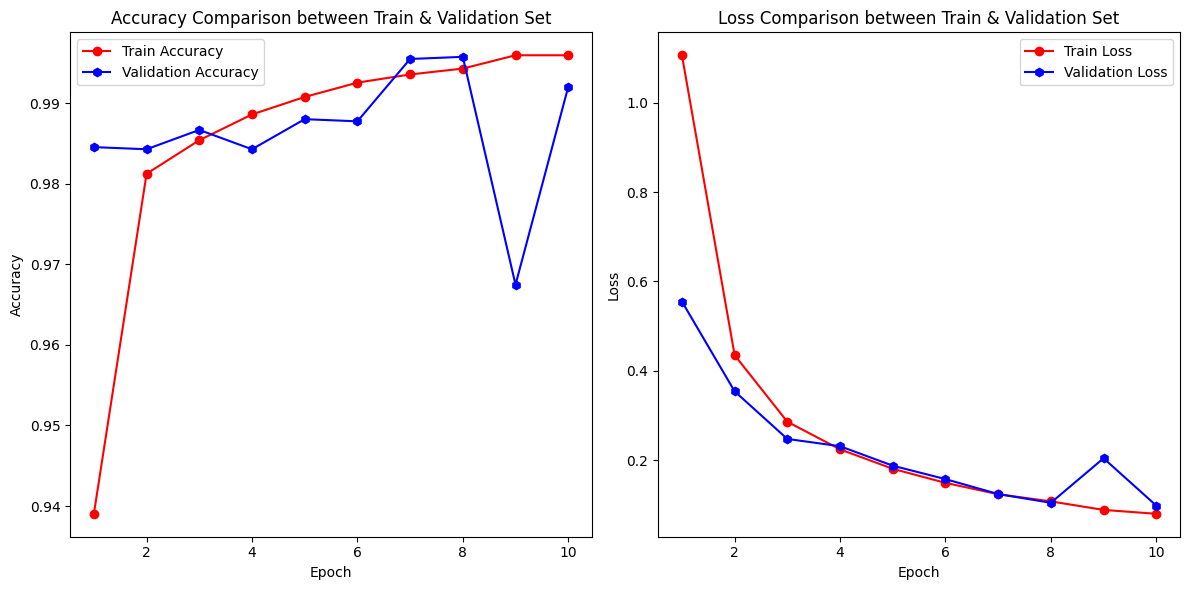

In [56]:
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'r', marker='o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', marker='h', label='Validation Accuracy')
plt.title('Accuracy Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'r', marker='o', label='Train Loss')
plt.plot(epochs, val_losses, 'b', marker='h', label='Validation Loss')
plt.title('Loss Comparison between Train & Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [57]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN6.evaluate(Test)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


469/469 [==============================] - 16s 33ms/step - loss: 0.0899 - accuracy: 0.9932
Test loss: 0.0899
Test accuracy: 0.9932


In [65]:
# Make predictions on the test set
predictions = CNN6.predict(Test)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Get true labels
y_true = Test.classes

y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Assuming you have labels mapping, you can get class names
class_names = list(Test.class_indices.keys())

# Print some predictions and true labels for verification
# Create a DataFrame to store predictions and true labels
df = pd.DataFrame({'Predicted': [class_names[pred] for pred in y_pred],
                   'True': [class_names[true] for true in y_true]})

df



469/469 [==============================] - 16s 34ms/step


,Predicted,True
0,Arborio,Arborio
1,Arborio,Arborio
2,Arborio,Arborio
3,Arborio,Arborio
4,Arborio,Arborio
...,...,...
14995,Karacadag,Karacadag
14996,Karacadag,Karacadag
14997,Karacadag,Karacadag
14998,Karacadag,Karacadag


In [59]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       1.00      0.99      0.99      3000
           2       1.00      1.00      1.00      3000
           3       0.98      1.00      0.99      3000
           4       1.00      0.99      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()